In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)

(array([   2.,    9.,   46.,  111.,  232.,  297.,  203.,   78.,   18.,    4.]),
 array([-3.81568697, -3.09832869, -2.38097041, -1.66361213, -0.94625385,
        -0.22889558,  0.4884627 ,  1.20582098,  1.92317926,  2.64053754,
         3.35789581]),
 <a list of 10 Patch objects>)

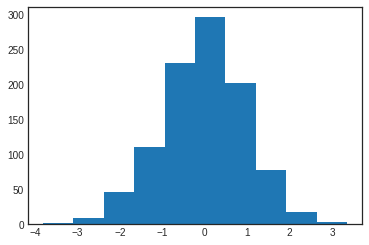

In [2]:
plt.hist(data)

(array([ 0.00670454,  0.00335227,  0.00670454,  0.00335227,  0.01676135,
         0.01676135,  0.0335227 ,  0.03687497,  0.05698859,  0.07374994,
         0.07374994,  0.10727263,  0.08715901,  0.15085214,  0.11397717,
         0.16090895,  0.17431803,  0.15755668,  0.19443165,  0.18102257,
         0.16426122,  0.211193  ,  0.18772711,  0.211193  ,  0.15755668,
         0.16426122,  0.11397717,  0.1106249 ,  0.09386355,  0.0670454 ,
         0.04693178,  0.05028405,  0.03017043,  0.02681816,  0.01340908,
         0.01340908,  0.        ,  0.01340908,  0.01005681,  0.01005681]),
 array([-2.9173965 , -2.61909116, -2.32078581, -2.02248046, -1.72417512,
        -1.42586977, -1.12756442, -0.82925908, -0.53095373, -0.23264838,
         0.06565696,  0.36396231,  0.66226766,  0.960573  ,  1.25887835,
         1.5571837 ,  1.85548904,  2.15379439,  2.45209974,  2.75040508,
         3.04871043,  3.34701578,  3.64532112,  3.94362647,  4.24193182,
         4.54023716,  4.83854251,  5.13684786,  5

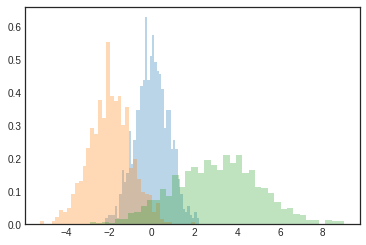

In [3]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [4]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

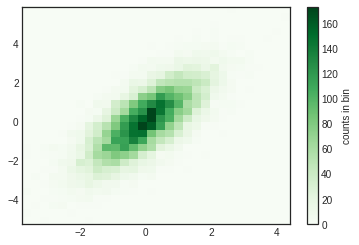

In [6]:
plt.hist2d(x, y, bins=30, cmap='Greens')
cb = plt.colorbar()
cb.set_label('counts in bin')


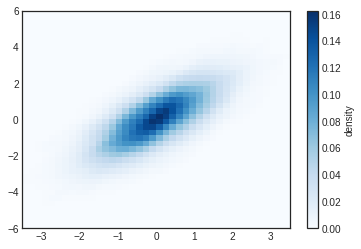

In [7]:


from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")



In [8]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

IOError: File data/california_cities.csv does not exist